**1. Импорт библиотек и предобработка данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')

In [4]:
#Посмотрим на наш датасет:
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
# Переименуем столбец 'number' во что-то более понятное и конкретное
df = df.rename(columns={'number':'total_seats'})

In [6]:
# Посмотрим на содержание столбца 'object_type'
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [7]:
# Посмотрим на столбец 'chain'
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [8]:
# заменим для удобство
df['chain'] = df['chain'].map({'нет':'не сеть','да':'сеть'})

In [9]:
# Откинем заглавные буквы в следующих столбцах:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [10]:
# Проверим на дудликаты:
df.duplicated().sum()

0

In [11]:
display(df.head())

,id,object_name,chain,object_type,address,total_seats
0,151635,сметана,не сеть,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,не сеть,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,не сеть,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,сеть,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,не сеть,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Вывод: Данные предобработаны. В изменении типов нет необходимости. Дубликаты не обнаружены. Сделана пара косметических доработок.

In [12]:
# сделаем копию, чтобы не поплыл код снизу
df_duplicated = df.copy()
#откинем столбец id
df_duplicated = df_duplicated.drop(['id'], axis = 1)
df_duplicated.duplicated().sum()

85

In [13]:
#посмотрим на дубликаты
df_duplicated[df_duplicated.duplicated(keep=False)]

,object_name,chain,object_type,address,total_seats
2374,комбинат питания мгту им.н.э.баумана,не сеть,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
2381,комбинат питания мгту им.н.э.баумана,не сеть,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
2869,laltro bosco,не сеть,ресторан,"город москва, улица петровка, дом 10",145
3396,буфет «коникс-школьник»,не сеть,буфет,"город москва, улица удальцова, дом 21",100
3397,буфет «коникс-школьник»,не сеть,буфет,"город москва, улица удальцова, дом 21",100
...,...,...,...,...,...
14596,буфет при кинотеатре,не сеть,буфет,"город москва, ореховый бульвар, дом 22а",0
14843,sushi-make,не сеть,предприятие быстрого обслуживания,"город москва, ярцевская улица, дом 19",0
14844,sushi-make,не сеть,предприятие быстрого обслуживания,"город москва, ярцевская улица, дом 19",0
15173,кофе с собой,сеть,предприятие быстрого обслуживания,"город москва, алтуфьевское шоссе, дом 70, корп...",0


 **2. Анализ данных**

**2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график**

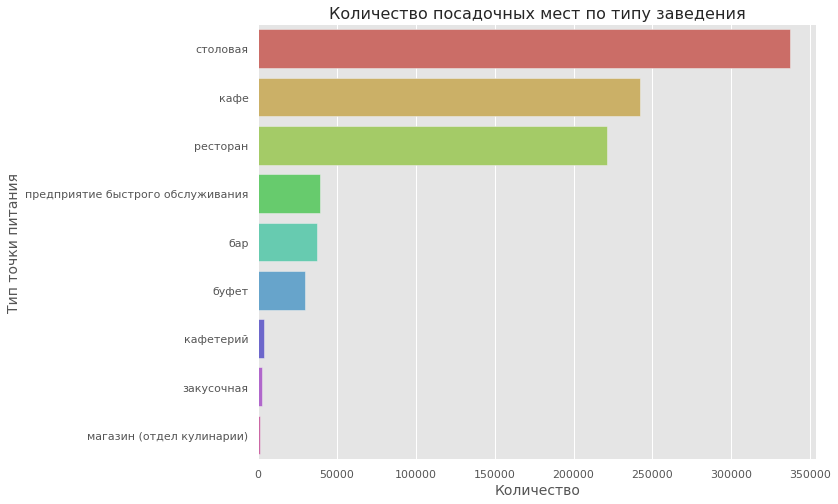

In [14]:
temp = df.groupby('object_type').sum().reset_index()
temp = temp.sort_values(by = 'total_seats', ascending = False)
temp = sns.barplot(x='total_seats', y='object_type', data=temp, palette='hls');
temp.axes.set_title('Количество посадочных мест по типу заведения', fontsize=16)
temp.set_xlabel('Количество', fontsize=14)
temp.set_ylabel("Тип точки питания", fontsize=14);

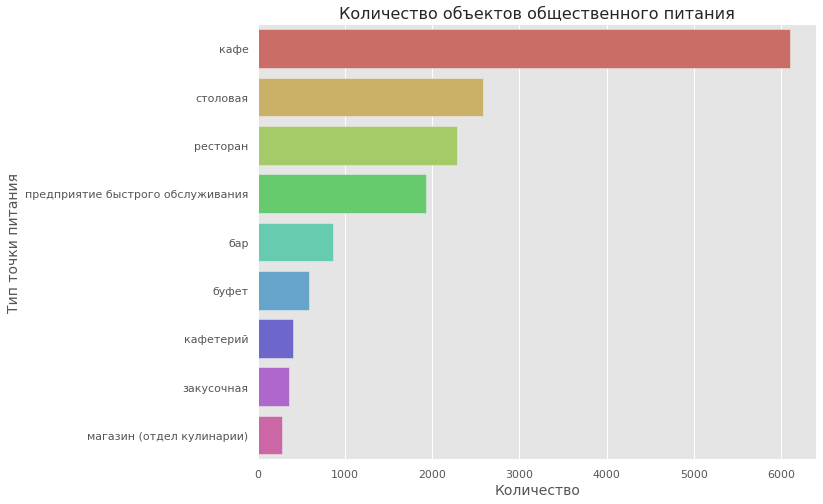

In [15]:
temp1 = df.groupby('object_type').count().reset_index()
temp1 = temp1.sort_values(by = 'id', ascending = False)
temp1 = sns.barplot(x='id', y='object_type', data=temp1, palette='hls');
temp1.axes.set_title('Количество объектов общественного питания', fontsize=16)
temp1.set_xlabel('Количество', fontsize=14)
temp1.set_ylabel("Тип точки питания", fontsize=14);

Вывод по 2.1: Больше всего кафе, столовых, ресторанов и точек фаст-фуда, остальных сильно меньше. Следует отметить, что по количеству посадочных мест - столовые вне конкуренции.

**2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график**

In [16]:
temp2 = df.groupby('chain')['object_name'].count()
temp2.to_frame()

,object_name
chain,
не сеть,12398
сеть,2968


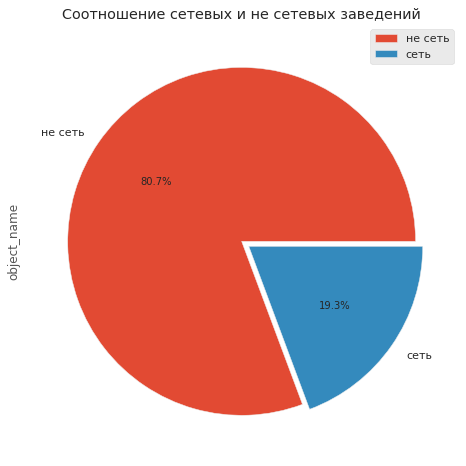

In [17]:
ax = temp2.plot(kind='pie', autopct='%1.1f%%', legend=True, explode =(0,0.05))
ax.set_title('Cоотношение сетевых и не сетевых заведений');

Вывод по 2.2: Одиночных заведений практически в 4 раза больше, чем сетевых

**2.3 Для какого вида объекта общественного питания характерно сетевое распространение?**

In [18]:
# Сделаем срез по столбцу chain
net = df[df['chain'] == 'сеть']

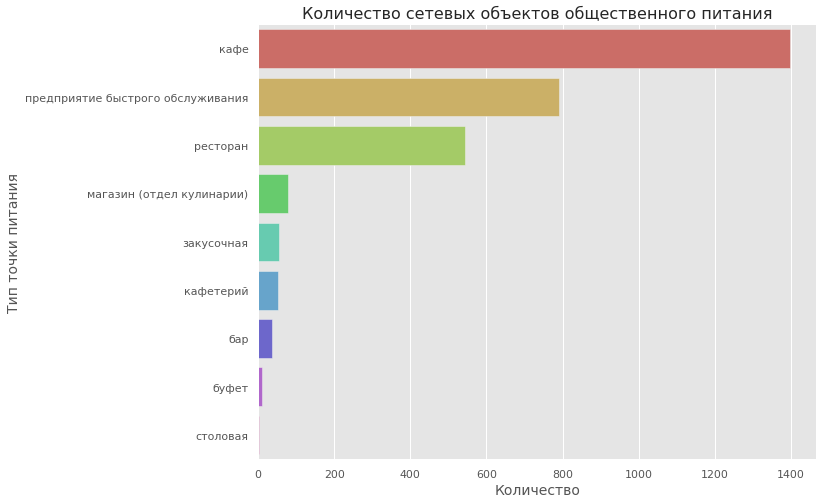

In [19]:
temp3 = net.groupby('object_type').count().reset_index()
temp3 = temp3.sort_values(by = 'id', ascending = False)
temp3 = sns.barplot(x='id', y='object_type', data=temp3, palette='hls');
temp3.axes.set_title('Количество сетевых объектов общественного питания', fontsize=16)
temp3.set_xlabel('Количество', fontsize=14)
temp3.set_ylabel("Тип точки питания", fontsize=14);

In [20]:
df_net = df.pivot_table(index='object_type', columns='chain', aggfunc='count', values='id')
df_net['net_percent'] = (df_net['сеть'] / (df_net['не сеть'] + df_net['сеть']))*100
df_net.sort_values(by='net_percent', ascending=False).round(1)

chain,не сеть,сеть,net_percent
object_type,,,
предприятие быстрого обслуживания,1132,791,41.1
магазин (отдел кулинарии),195,78,28.6
ресторан,1741,544,23.8
кафе,4703,1396,22.9
закусочная,304,56,15.6
кафетерий,346,52,13.1
бар,819,37,4.3
буфет,574,11,1.9
столовая,2584,3,0.1


Вывод по 2.3: Больше всего сетевых заведений приходится на кафе, фаст-фуд и рестораны. По процентному соотношению больше всего сетевых заведений у фаст-фудов, кулинарии и ресторанов

**2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**

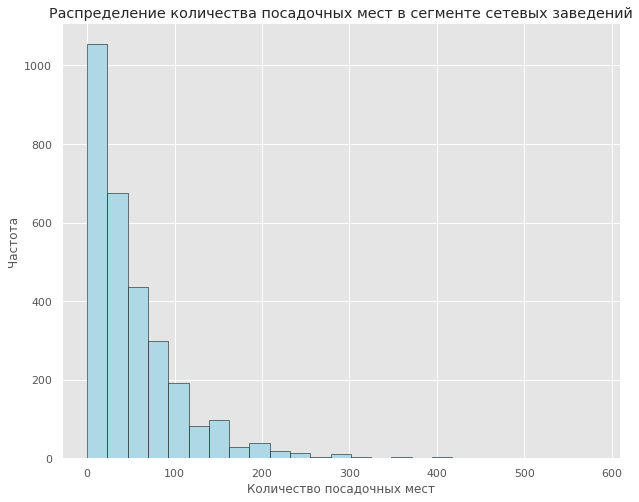

In [21]:
ax = net['total_seats'].hist(bins=25, ec='black', color='lightblue');
ax.set_title('Распределение количества посадочных мест в сегменте сетевых заведений');
ax.set_xlabel('Количество посадочных мест');
ax.set_ylabel('Частота');

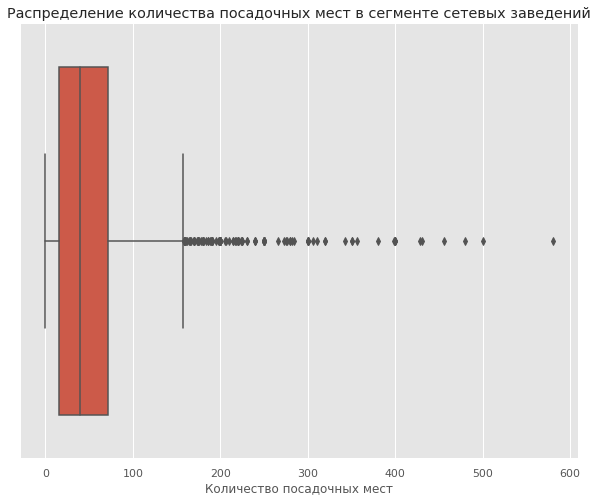

In [22]:
ax = sns.boxplot(x=net['total_seats'])
ax.set_title('Распределение количества посадочных мест в сегменте сетевых заведений');
ax.set_xlabel('Количество посадочных мест');

Вывод по 2.4: Количество посадочных мест минимально, хотя заведений достаточно много.

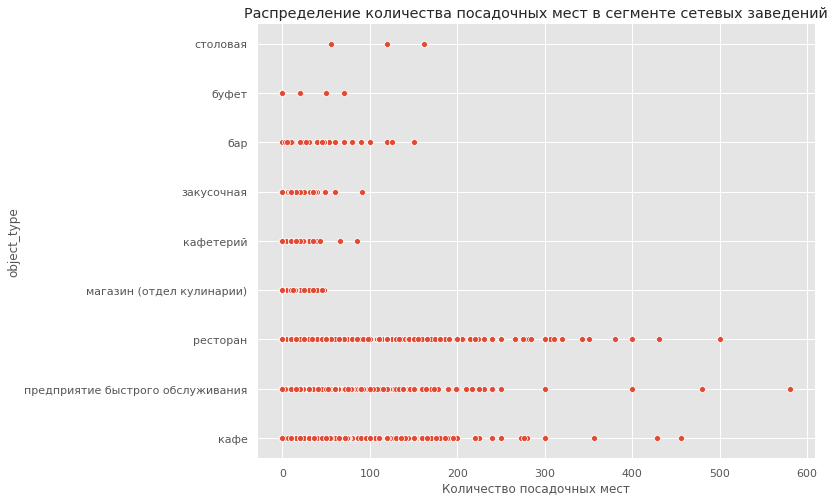

In [23]:
ax = sns.scatterplot(x='total_seats', y='object_type', data=net, palette="hls")
ax.set_title('Распределение количества посадочных мест в сегменте сетевых заведений');
ax.set_xlabel('Количество посадочных мест');

In [24]:
net_grouped_object = net.groupby('object_name')['id'].count()

In [25]:
net_grouped_seats = net.groupby('object_name')['total_seats'].mean().round(1)

In [26]:
net_grouped = pd.merge(net_grouped_object, net_grouped_seats, on='object_name')
net_grouped.columns = ['quantity', 'total_seats_mean']
net_grouped.head(10)

,quantity,total_seats_mean
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,66.7
boobo,1,46.0
bubbleology,1,6.0
burger club,3,20.3
coffeeshop,1,0.0
coffeeshop company,4,47.2


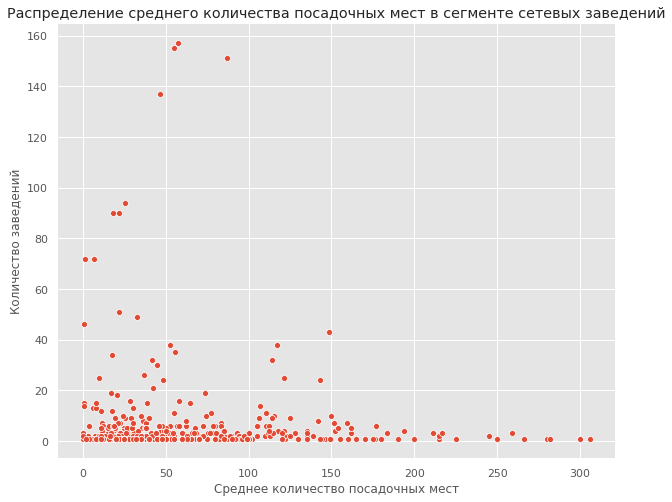

In [27]:
ax = sns.scatterplot(y='quantity', x='total_seats_mean', data=net_grouped, palette="hls")
ax.set_title('Распределение среднего количества посадочных мест в сегменте сетевых заведений');
ax.set_xlabel('Cреднее количество посадочных мест');
ax.set_ylabel('Количество заведений');

Основная масса сетевых заведений расположены в диапазонах от 0 до 100 посадочных мест с количеством заведений от 1 до 5

**2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.**

In [28]:
mean = df.groupby('object_type')['total_seats'].describe().sort_values(by='mean', ascending=False).round(2)
mean2 = mean['mean'].to_frame()
mean2

,mean
object_type,
столовая,130.25
ресторан,96.83
буфет,51.13
бар,43.49
кафе,39.72
предприятие быстрого обслуживания,20.55
кафетерий,9.12
закусочная,7.61
магазин (отдел кулинарии),5.59


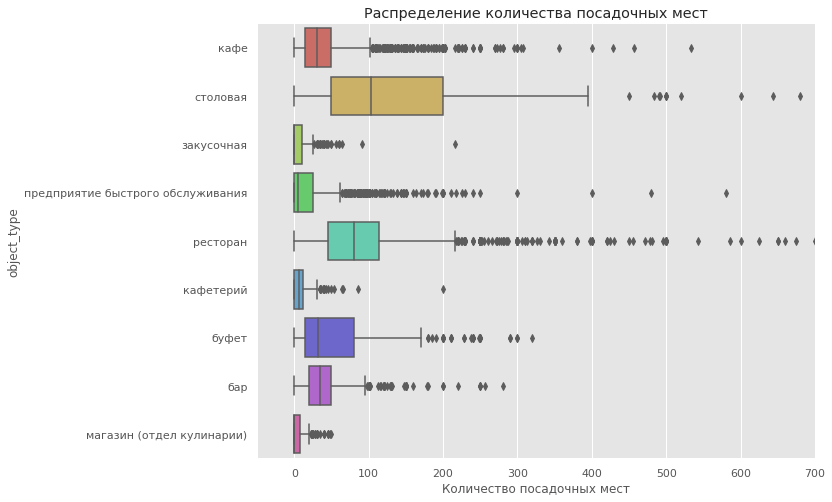

In [29]:
ax = sns.boxplot(x='total_seats', y='object_type', data=df, palette="hls")
ax.set_xlim(-50,700)
ax.set_xlabel('Количество посадочных мест');
ax.set_title('Распределение количества посадочных мест');

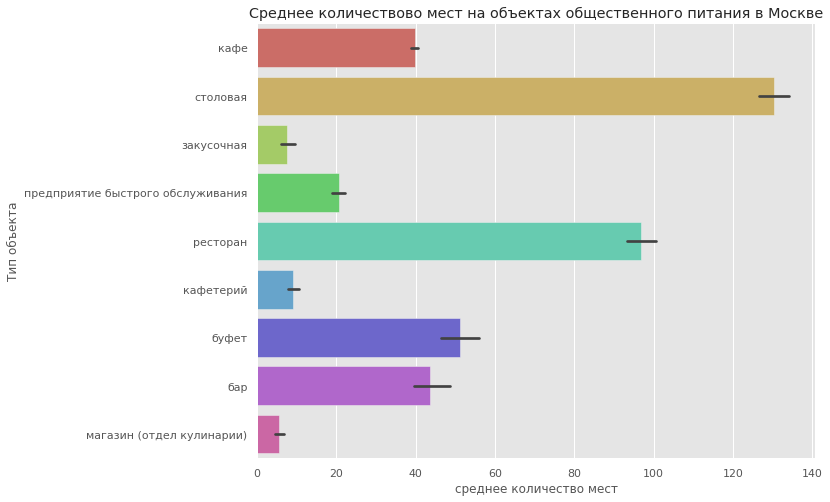

In [30]:
ax = sns.barplot(y='object_type', x='total_seats', data=df, palette="hls")
ax.set_ylabel('Тип объекта')
ax.set_xlabel('среднее количество мест')
ax.set_title('Cреднее количествово мест на объектах общественного питания в Москве');

Вывод по 2.5: Если брать по среднему, то наибольшим числом посадочных мест обладают столовые и рестораны

**2.6 Выделите в отдельный столбец информацию об улице из столбца 'address'.**

In [31]:
#Выберем разделитель
df['street'] = df['address'].apply(lambda x: x.split(', ')[1])

In [32]:
#проверим, появились ли пропуски в новом столбце
df[df['street'] == ''].count()

id             0
object_name    0
chain          0
object_type    0
address        0
total_seats    0
street         0
dtype: int64

In [33]:
df['street'].value_counts().head(11)

город зеленоград          232
проспект мира             204
профсоюзная улица         182
ленинградский проспект    171
пресненская набережная    167
варшавское шоссе          161
ленинский проспект        147
поселение сосенское       138
проспект вернадского      132
кутузовский проспект      114
каширское шоссе           112
Name: street, dtype: int64

In [34]:
# В нужном нам столбце появились города-спутники Москвы, область это или городская прописка - я не знаю.
# поэтому откинем эти строки из анализа. Оставим только улицы.
df = df.drop(df[df['street'] == 'поселение сосенское'].index)
df = df.drop(df[df['street'] == 'город зеленоград'].index)

In [35]:
#проверим
df['street'].value_counts().head(10)

проспект мира             204
профсоюзная улица         182
ленинградский проспект    171
пресненская набережная    167
варшавское шоссе          161
ленинский проспект        147
проспект вернадского      132
кутузовский проспект      114
каширское шоссе           112
кировоградская улица      110
Name: street, dtype: int64

In [36]:
display(df.head(7))

,id,object_name,chain,object_type,address,total_seats,street
0,151635,сметана,не сеть,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,не сеть,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,не сеть,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сеть,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,не сеть,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,не сеть,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,сеть,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек


Вывод по 2.6: Улицы извлечены без потерь

**2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**

In [37]:
#Воспользуемся внешними данными и найдем таблицу соответствия улиц и оругов г. Москва. Загрузим ее к проекту.
#Посмотрим общую информацию

In [38]:
from io import BytesIO
import requests

spreadsheet_id = '1VAmteMT1EFTK3_7pRM89vS2WLTEOfyYklrOxTqTw8CE'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

r = requests.get(file_name)
df1 = pd.read_csv(BytesIO(r.content))

In [39]:
display(df1.info())
display(df1.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


None

,streetname,areaid,okrug,area
3091,Луганская улица,107,ЮАО,Район Царицыно
1048,"МКАД, 5-й километр",23,ВАО,Район Вешняки
1375,Витебская улица,41,ЗАО,Можайский Район
1836,3-й Балтийский переулок,54,САО,Район Аэропорт
10,Грузинский переулок,17,ЦАО,Пресненский район
1239,Заречная улица,48,ЗАО,Район Филевский Парк
771,улица Дмитриевского,28,ВАО,Район Косино-Ухтомский
4120,4-я Павлоградская улица,133,ЮЗАО,Район Южное Бутово
2916,улица Маршала Новикова,93,СЗАО,Район Щукино
3262,1-й Верхний Михайловский проезд,99,ЮАО,Донской район


In [40]:
# Немного предобработаем таблиу, переименуем столбец с улицами аналогично датасету df(исходному)
# и скинем названия улиц в нижней регистр

df1 = df1.rename(columns ={'streetname' : 'street'})
df1['street'] = df1['street'].str.lower()

In [41]:
top10_graph = df.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top10_graph

,street,id,object_name,chain,object_type,address,total_seats
0,проспект мира,204,204,204,204,204,204
1,профсоюзная улица,182,182,182,182,182,182
2,ленинградский проспект,171,171,171,171,171,171
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,161,161,161,161,161,161
5,ленинский проспект,147,147,147,147,147,147
6,проспект вернадского,132,132,132,132,132,132
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,112,112,112,112,112,112
9,кировоградская улица,110,110,110,110,110,110


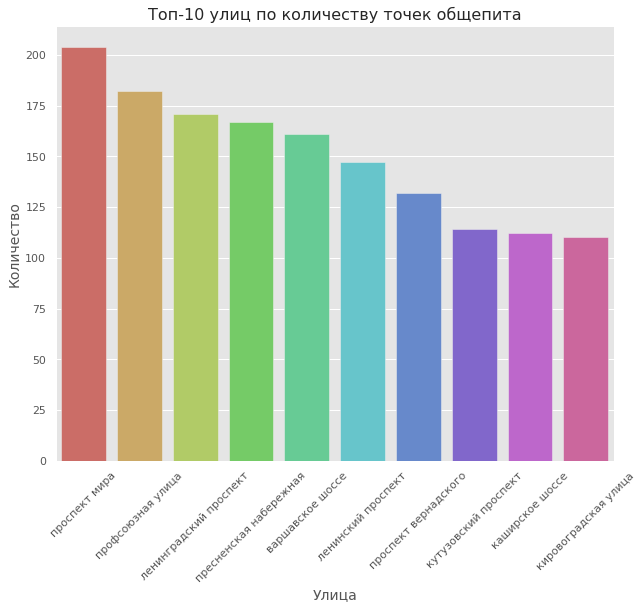

In [42]:
top10_graph = sns.barplot(x='street', y='id', data=top10_graph, palette='hls');
top10_graph.axes.set_title('Топ-10 улиц по количеству точек общепита', fontsize=16)
top10_graph.set_xlabel('Улица', fontsize=14)
top10_graph.set_ylabel("Количество", fontsize=14)
plt.xticks(rotation=45);


In [43]:
#Найдем районы, в которых расположены эти улицы
top10 = df.groupby('street')['id'].count().sort_values(ascending=False).reset_index().head(10)
top10 = top10.merge(df1, on='street', how='left')
top10 = top10.pivot_table(index=['street', 'area', 'okrug'], values='id', aggfunc='max')
top10.sort_values(by='id', ascending=False)

id
street                 area                            okrug     
проспект мира          Район Ростокино                 СВАО   204
                       Ярославский Район               СВАО   204
                       Алексеевский район              СВАО   204
                       Мещанский район                 ЦАО    204
                       Останкинский район              СВАО   204
                       Район Марьина роща              СВАО   204
                       Район Свиблово                  СВАО   204
профсоюзная улица      Район Ясенево                   ЮЗАО   182
                       Академический район             ЮЗАО   182
                       Обручевский район               ЮЗАО   182
                       Район Коньково                  ЮЗАО   182
                       Район Теплый Стан               ЮЗАО   182
                       Район Черемушки                 ЮЗАО   182
ленинградский проспект Район Сокол                     САО    171
                       Хорошевский район               САО    171
                       Район Аэропорт                  САО    171
                       Район Беговой                   САО    171
пресненская набережная Пресненский район               ЦАО    167
варшавское шоссе       Нагорный район                  ЮАО    161
                       Донской район                   ЮАО    161
                       Район Нагатино-Садовники        ЮАО    161
                       Район Северное Бутово           ЮЗАО   161
                       Район Чертаново Северное        ЮАО    161
                       Район Чертаново Центральное     ЮАО    161
                       Район Чертаново Южное           ЮАО    161
                       Район Южное Бутово              ЮЗАО   161
ленинский проспект     Район Гагаринский               ЮЗАО   147
                       Донской район                   ЮАО    147
                       Ломоносовский район             ЮЗАО   147
                       Обручевский район               ЮЗАО   147
                       Район Проспект Вернадского      ЗАО    147
                       Район Теплый Стан               ЮЗАО   147
                       Район Тропарево-Никулино        ЗАО    147
                       Район Якиманка                  ЦАО    147
проспект вернадского   Район Тропарево-Никулино        ЗАО    132
                       Район Раменки                   ЗАО    132
                       Район Проспект Вернадского      ЗАО    132
                       Район Гагаринский               ЮЗАО   132
                       Ломоносовский район             ЮЗАО   132
кутузовский проспект   Район Дорогомилово              ЗАО    114
                       Район Фили-Давыдково            ЗАО    114
каширское шоссе        Район Орехово-Борисово Южное    ЮАО    112
                       Район Орехово-Борисово Северное ЮАО    112
                       Район Нагатино-Садовники        ЮАО    112
                       Район Москворечье-Сабурово      ЮАО    112
кировоградская улица   Район Чертаново Центральное     ЮАО    110
                       Район Чертаново Северное        ЮАО    110
                       Район Чертаново Южное           ЮАО    110

Вывод по 2.7: C точностью до района невозможно определить топ-10 улиц по количеству заведений. Очевидно, что такие улицы очень длинные и проходят сразу по территории нескольких районов.

**2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**

In [44]:
only_one_street = df.groupby('street').count().sort_values(by='object_type', ascending=True).reset_index()
only_one_street = only_one_street.query('id == 1')
only_one_street = only_one_street.merge(df1, on='street', how='left')
only_one_street = only_one_street.groupby('area').count().sort_values(by='street', ascending=False).reset_index()

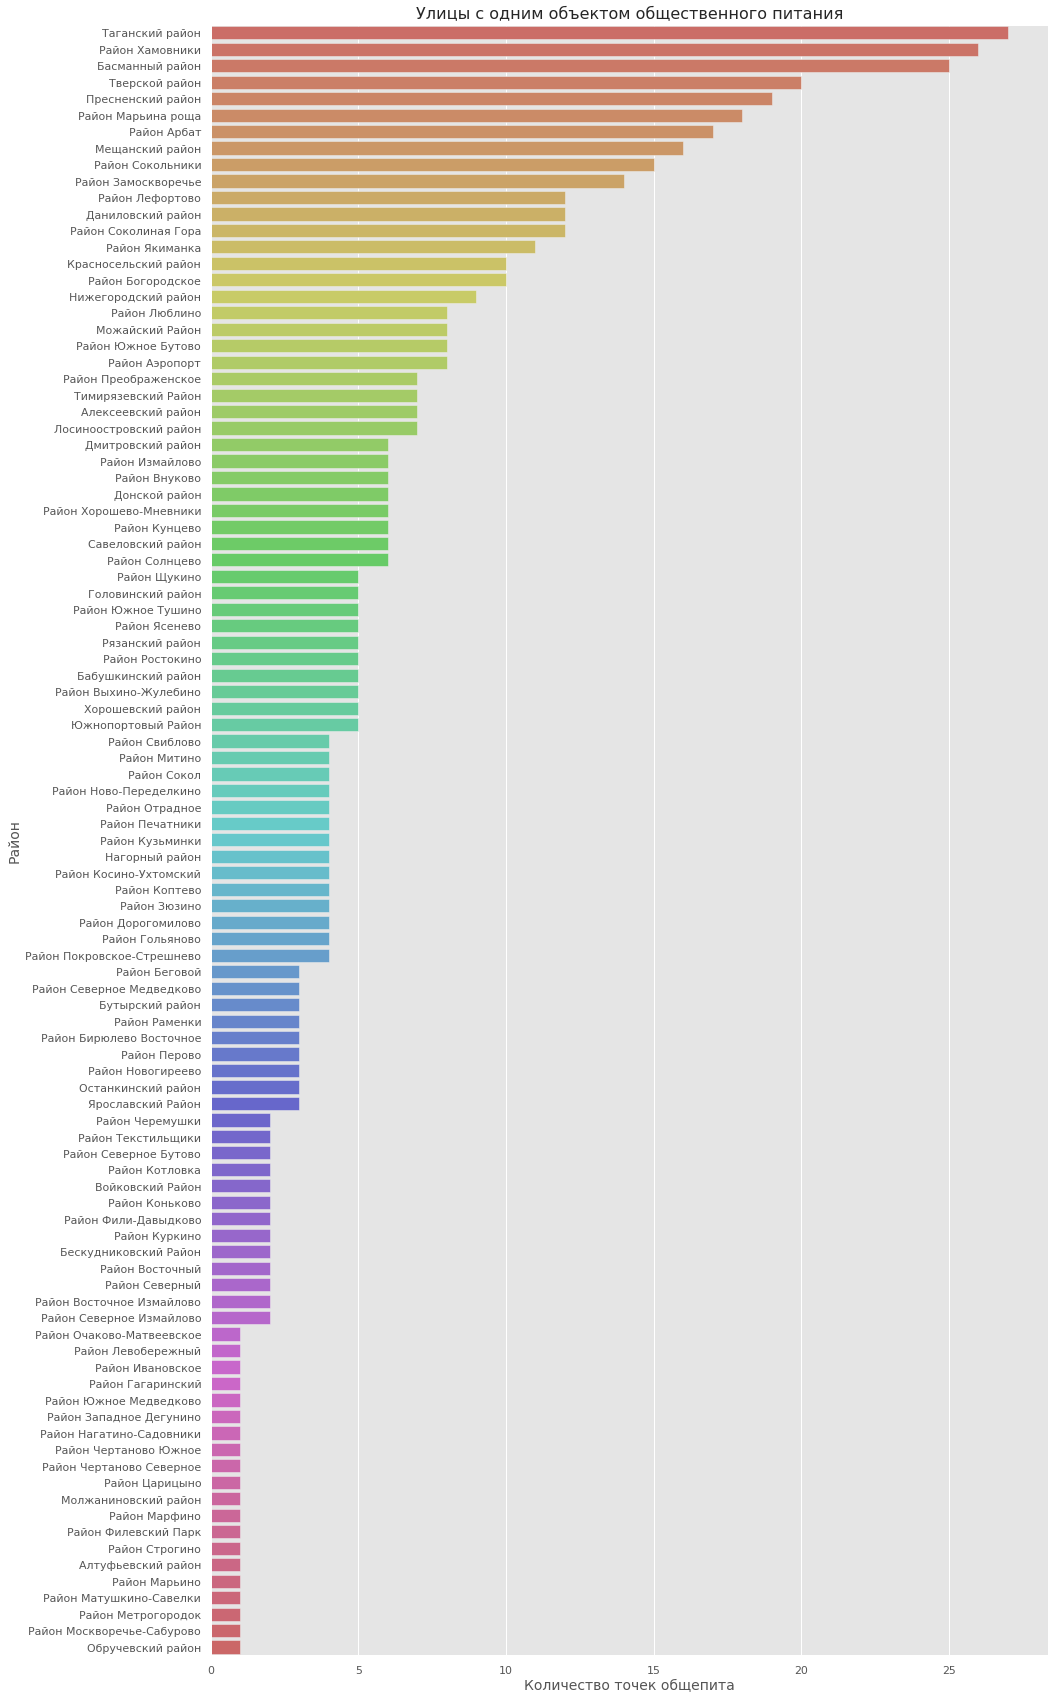

In [45]:
plt.figure(figsize=(15,30))
only_one_street = sns.barplot(y='area', x='street', data=only_one_street, palette='hls');
only_one_street.axes.set_title('Улицы с одним объектом общественного питания', fontsize=16)
only_one_street.set_ylabel('Район', fontsize=14)
only_one_street.set_xlabel("Количество точек общепита", fontsize=14);

**2.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?**

In [46]:
top10_street = df.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top10_street = top10_street['street'].to_list()
top10_street

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

In [47]:
df = df.query('street == @top10_street')

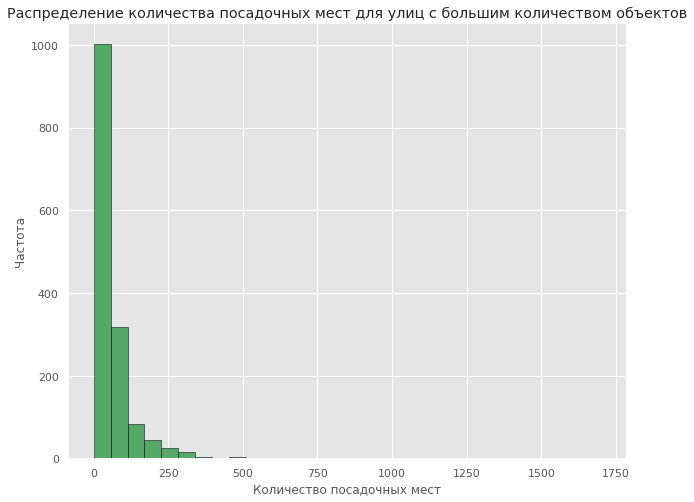

In [48]:
ax = df['total_seats'].hist(bins=30, ec='black', color='g');
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов');
ax.set_xlabel('Количество посадочных мест');
ax.set_ylabel('Частота');

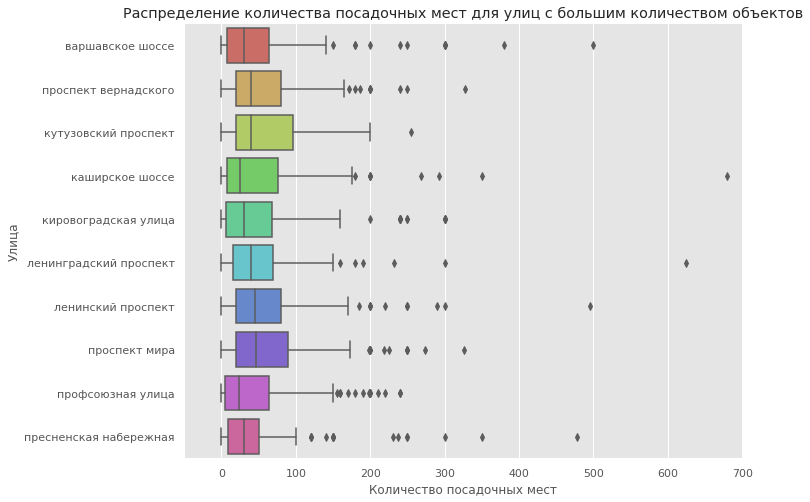

In [49]:
ax = sns.boxplot(x='total_seats', y='street', data=df, palette="hls")
ax.set_xlim(-50,700)
ax.set_xlabel('Количество посадочных мест');
ax.set_ylabel('Улица');
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов');

Вывод по 2.9: Среднее количество очень мало, составляет порядка 50. Оно и понятно, аренда больших помещений - дорогое удовольствие

**Общий вывод и рекомендации:**

   Наиболее вместительные места общественного питания - это столовые, но большое количество мест, как правило, компенсируется низкой ценой продукта. Так что, вероятнее всего, это не самый прибыльный вид бизнеса, он скорее - социальный. Для нашей задачи он не подходит.

Топ-10 улиц по кличеству точек общепита выглядит так: Проспект мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, Проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировоградская улица. Улицы, пересекающие не один район Москвы. У нас нет данных о количестве точек общепита на квадратный километр, а так же проходимости определенных участков. Но очевидно, что открытие бизнеса в этих местах чревато высокой конкуренцией.

  Доля сетевых заведений в Москве близка к 20% от рынка. Если заходить в этот бизнесс то наиболее оптимальный вариант - это открыть кафе, фаст-фуд или ресторан с числом посадочных мест порядка 50. Недостаток сетевых заведений испытвают следующие районы Москвы: Таганский, Хамовники, Басманный, Тверской и Пресненский. Именно там находится большинство улиц только с одной точкой питания. Кажется, это оптимальные районы для открытия сетевых точек и не только

Итоговый вывод таков: Надо открывать кафе или ресторан с числом посадочных мест порядка 50 на улице, расположенных в следующий районах:


- Таганский
- Хамовники
- Басманный 
- Тверской 
- Пресненский       

Для полноты картины, конечно, не хватает данных о цене квадратного метра помещений и данных о "проходимости" улиц

**Презентация: https://disk.yandex.ru/i/Q4byaRnTMxlkKA**